In [1]:
from __future__ import division
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np,  matplotlib.pyplot as plt, gc
from time import time
from pylab import plot, show, legend
from PF import *
from Lorenz63 import *
plt.rcParams['figure.figsize'] = (15.0, 3.0)

In [2]:
dt = 5e-3
delta = 10*dt
T = 100

sigma, rho, beta, noise_intensity, obs_noise = 10.0, 28.0, 8/3, 5e-1, 5e-1
theta = [sigma, rho, beta, noise_intensity, dt, delta, obs_noise]
x_0 = np.ones(3)

y, X = simulate_data_Lorenz63(theta, x_0, T)
data = dict(x_0=x_0, y=y)

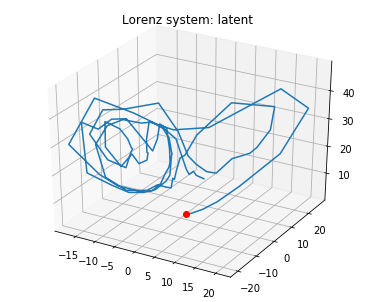

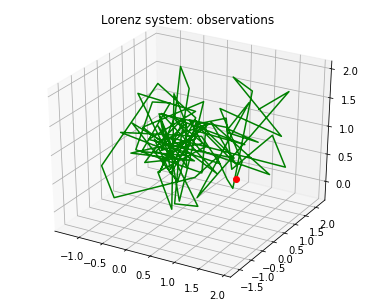

In [3]:
plt.rcParams['figure.figsize'] = (5.0, 4.0)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X[:,0], X[:,1], X[:,2])
ax.plot(X[0:1,0], X[0:1,1], X[0:1,2], 'ro')
plt.title("Lorenz system: latent");

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(y[:,0], y[:,1], y[:,2], color='green')
ax.plot(y[0:1,0], y[0:1,1], y[0:1,2], 'ro')
plt.title("Lorenz system: observations");

In [4]:
def test_fn(x) : return np.mean(x,1)

In [5]:
potential, propagate = potential_Lorenz63, propagate_Lorenz63
pow_list = np.arange(11,16)
N_list = 2**pow_list
rep = 200
logNC, testfn = np.zeros((len(N_list),rep)), np.zeros((len(N_list),rep))
for r in trange(rep) :
    for (i,N) in enumerate(N_list) :
        log_NC_bpf, test_fn_bpf, _ = bootstrap_PF(data, theta, potential, propagate, test_fn, N, store_paths=False)
        logNC[i,r], testfn[i,r] = log_NC_bpf[-1], test_fn_bpf[-1]
        del log_NC_bpf, test_fn_bpf, _
        gc.collect()

100%|██████████| 200/200 [31:20<00:00,  9.45s/it]


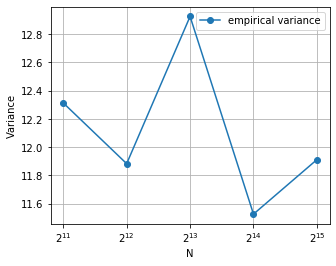

In [13]:
fig, ax = plt.subplots()
ax.set_xscale('log', basex=2)
ax.plot(N_list, np.sqrt(N_list)*np.std(logNC,1), "o-", label="empirical variance")
# ax.plot(N_list, 10/np.sqrt(N_list), label="Theory")
plt.grid("True")
plt.legend()
plt.xlabel("N")
plt.ylabel("Variance");

In [12]:
2**17

131072

In [11]:
2**7

128